In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sysidentpy.metrics import mean_squared_error
from sysidentpy.polynomial_basis import PolynomialNarmax, SimulatePolynomialNarmax

In [4]:
# Get File Names
folder_path = os.path.join(os.path.abspath(''), '..', 'Data', 'Generated', 'Barabasi')
file_path = os.path.join(folder_path, '100_Mixed_Model_(20000_2).npy')

In [5]:
avg_degrees = np.load(file_path)
nodes = avg_degrees.shape[1]

m = 2
t = np.arange(1, nodes - m + 1)
k_mod = avg_degrees[m:,m]
print(avg_degrees[m:,m])
print(t)

[  2.     2.63   3.19 ... 356.06 356.06 356.07]
[    1     2     3 ... 19996 19997 19998]


In [6]:
x_train = x_valid = np.ones(len(k_mod)).reshape(-1, 1)
y_train = y_valid = k_mod.reshape(-1, 1)

In [7]:
model = PolynomialNarmax(
    non_degree=3,
    order_selection=True,
    n_info_values=10,
    extended_least_squares=False,
    ylag=10,
    xlag=10,
    info_criteria='aic',
    estimator='least_squares'
)

In [8]:
model.fit(x_train, y_train)

/local/anaconda3/envs/dddu/lib/python3.9/site-packages/sysidentpy/parameter_estimation/estimators.py:113: UserWarning: Psi matrix might have linearly dependent rows.Be careful and check your data
  self._check_linear_dependence_rows(psi)


In [9]:
yhat = model.predict(x_valid, y_valid)
results = pd.DataFrame(model.results(err_precision=8, dtype='dec'), 
                        columns=['Regressors', 'Parameters', 'ERR'])
print(results)

  Regressors Parameters         ERR
0     y(k-1)     1.0843  0.99999999
1    y(k-10)    -0.0844  0.00000000
2          1     0.0210  0.00000000
3  y(k-10)^2     0.0002  0.00000000
4   y(k-1)^2    -0.0002  0.00000000


/local/anaconda3/envs/dddu/lib/python3.9/site-packages/sysidentpy/residues/residues_correlation.py:118: RuntimeWarning: invalid value encountered in double_scalars
  ruy[0] = np.sum(y * u) / (np.sqrt(np.sum(y ** 2)) * np.sqrt(np.sum(u ** 2)))
/local/anaconda3/envs/dddu/lib/python3.9/site-packages/sysidentpy/residues/residues_correlation.py:123: RuntimeWarning: invalid value encountered in double_scalars
  ruy[i] = np.sum(y[:-i] * u[i:]) / (


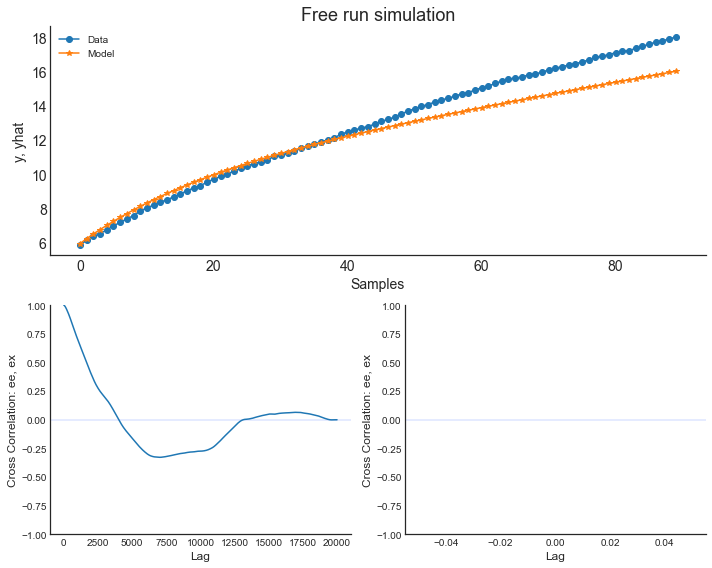

In [10]:
ee, ex, extras, lam = model.residuals(x_valid, y_valid, yhat)
model.plot_result(y_valid, yhat, ee, ex)
k_nrm = yhat

In [11]:
# Analytic approach
def barabasi(m, t, t_i):
    return m * np.sqrt(t / t_i)

k_ant = barabasi(2, t, 1)

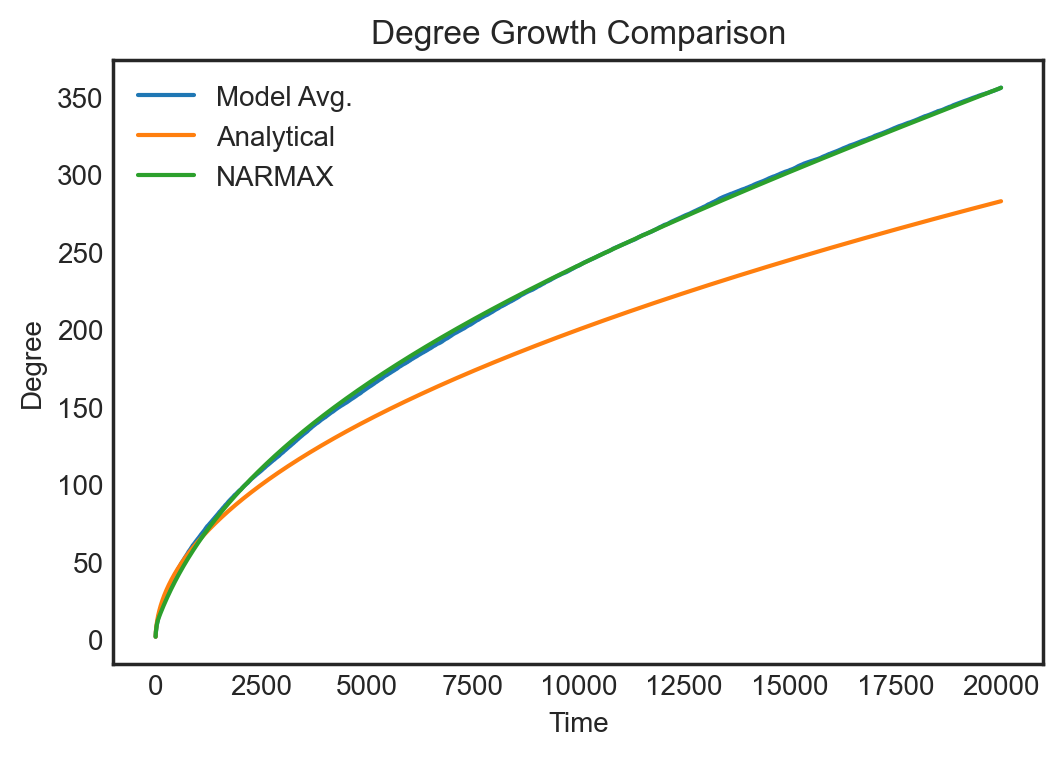

In [12]:
fig=plt.figure(figsize=(6,4), dpi= 200, facecolor='w', edgecolor='k')
plt.plot(t, k_mod)
plt.plot(t, k_ant)
plt.plot(t, k_nrm)
plt.title('Degree Growth Comparison')
plt.xlabel('Time')
plt.ylabel('Degree')
plt.legend(['Model Avg.', 'Analytical', 'NARMAX'])